# 구별 노후 건축물 비율 별 화재율 변화

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False
bdg_age_df = pd.read_csv('./filtered_data/gu_build_fire.csv', encoding='utf-8')
bdg_age_df.head()

,SGG_NM,화재건수,노후건물비율(%),평균층수,평균면적(m²),인구수,화재율(1만명당)
0,강남구,422,0.710900,7.515244,76520.875000,655545.114288,6.437391
1,강동구,171,1.754386,6.500000,8950.015873,509888.837375,3.353672
2,강북구,200,0.000000,4.924051,2247.943038,287913.541725,6.946530
3,강서구,274,0.000000,7.604762,9249.166667,526891.403000,5.200313
4,관악구,281,0.711744,5.097345,1795.407080,450404.012013,6.238843


노후건물비율과 화재율의 상관관계:
상관계수: 0.4712
p-value: 0.0174

✓ 그래프 저장 완료: ./results/노후건물비율_vs_화재율.png

✓ 그래프 저장 완료: ./results/노후건물비율_vs_화재율.png


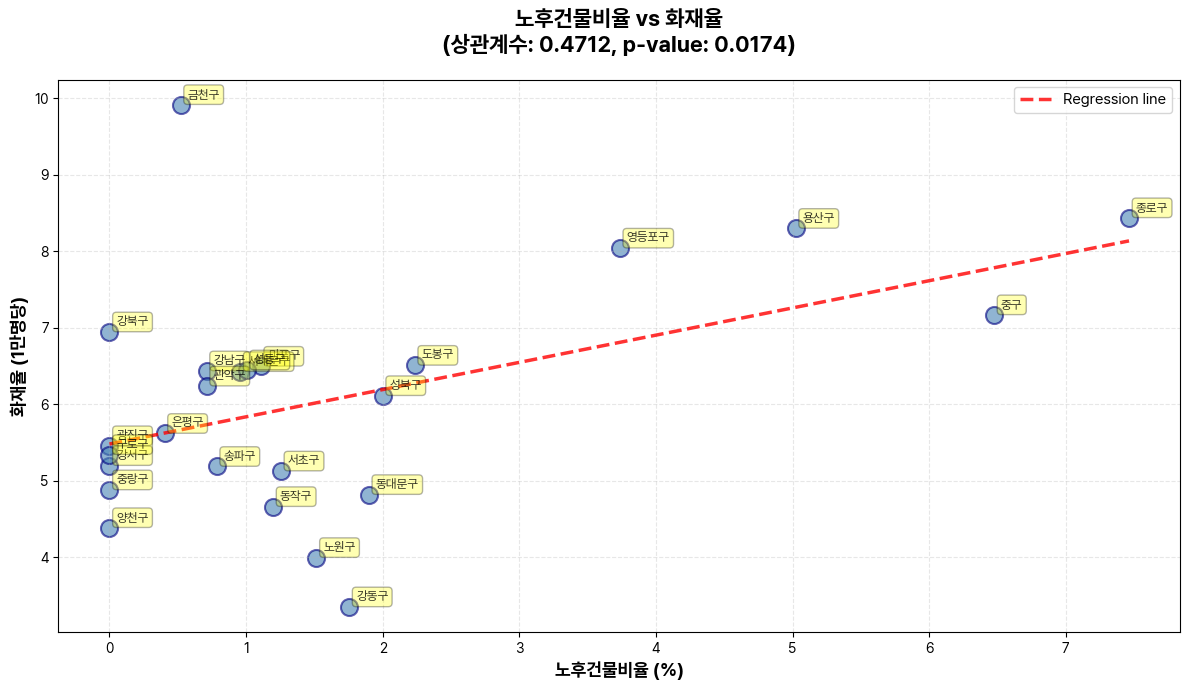

✓ 분석 결과 저장: ./results/building_age_fire_correlation.csv


In [5]:
import os
from scipy import stats

# results 디렉터리 확인/생성
os.makedirs('./results', exist_ok=True)

# 노후건물비율과 화재율의 상관관계 분석
correlation, p_value = stats.pearsonr(bdg_age_df['노후건물비율(%)'], bdg_age_df['화재율(1만명당)'])

print(f"노후건물비율과 화재율의 상관관계:")
print(f"상관계수: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# 그래프 생성
plt.figure(figsize=(12, 7))

# 산점도 생성
plt.scatter(bdg_age_df['노후건물비율(%)'], bdg_age_df['화재율(1만명당)'], 
            alpha=0.6, s=150, color='steelblue', edgecolors='navy', linewidth=1.5)

# 회귀선 추가
z = np.polyfit(bdg_age_df['노후건물비율(%)'], bdg_age_df['화재율(1만명당)'], 1)
p = np.poly1d(z)
x_line = np.linspace(bdg_age_df['노후건물비율(%)'].min(), 
                      bdg_age_df['노후건물비율(%)'].max(), 100)
plt.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2.5, label='Regression line')

# 제목 및 라벨
plt.title(f'노후건물비율 vs 화재율\n(상관계수: {correlation:.4f}, p-value: {p_value:.4f})', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('노후건물비율 (%)', fontsize=13, fontweight='bold')
plt.ylabel('화재율 (1만명당)', fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')

# 각 점에 구명 라벨 추가
for idx, row in bdg_age_df.iterrows():
    plt.annotate(row['SGG_NM'], 
                (row['노후건물비율(%)'], row['화재율(1만명당)']), 
                fontsize=9, alpha=0.8, xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('./results/노후건물비율_vs_화재율.png', dpi=300, bbox_inches='tight')
print(f"\n✓ 그래프 저장 완료: ./results/노후건물비율_vs_화재율.png")
plt.show()

# 분석 결과 저장
result_df = pd.DataFrame({
    '지표': ['노후건물비율 vs 화재율'],
    '상관계수': [correlation],
    'p-value': [p_value],
    '통계적유의성': ['Yes' if p_value < 0.05 else 'No']
})
result_df.to_csv('./results/building_age_fire_correlation.csv', index=False, encoding='utf-8')
print("✓ 분석 결과 저장: ./results/building_age_fire_correlation.csv")